# Torsion

The background theory on torsion is presented in the [lectures notes](http://www.facweb.iitkgp.ac.in/~jeevanjyoti/teaching/advmechsolids/2020/notes/torsion.pdf) maintained at the [Course Home Page for Advanced Mechanics of Solids](http://www.facweb.iitkgp.ac.in/~jeevanjyoti/teaching/advmechsolids/2020/).

We consider some applications of that theory in the following.

## Shaft with circular cross-section

The circle is given by $x^2+y^2=R^2$. 

The Prandtl stress function is given by $\psi = K\left(R^2 - x^2 - y^2\right)$.

In [1]:
import sympy as sp
from IPython.display import Math

x, y, r, R, K = sp.symbols('x, y, r, R, K')

boundary = (R**2 - (x**2 + y**2))

psi = K*boundary

display(Math(r'\psi = {}'.format(sp.latex(psi))))

<IPython.core.display.Math object>

We solve for $K$ by noting that $\psi$ must satisfy the equation $\nabla^2 \psi = -1$.

In [2]:
lhs = sp.diff(psi,x,2) + sp.diff(psi,y,2)
rhs = -1
eq = sp.Eq(lhs,rhs)
sol = sp.solve(eq,K)
Kvalue = sol[0]


display(Math(r'K = {}'.format(sp.latex(Kvalue))))

<IPython.core.display.Math object>

Let us plot the Prandtl stress function. We choose $R = 3$.

In [3]:
Rvalue = 3
boundary_expr = boundary.subs(R,Rvalue)
psi_expr = Kvalue*boundary_expr
display(Math(r'\psi = {}'.format(sp.latex(psi_expr))))

<IPython.core.display.Math object>

For the purpose of plotting, we proceed by making use of the `lambdify` operation. 

In [4]:
psi_lamb = sp.lambdify((x,y),psi_expr)

import numpy as np

xdata = np.linspace(-1.2*Rvalue,1.2*Rvalue,1000)
ydata = np.linspace(-1.2*Rvalue,1.2*Rvalue,1000)

X,Y = np.meshgrid(xdata,ydata)

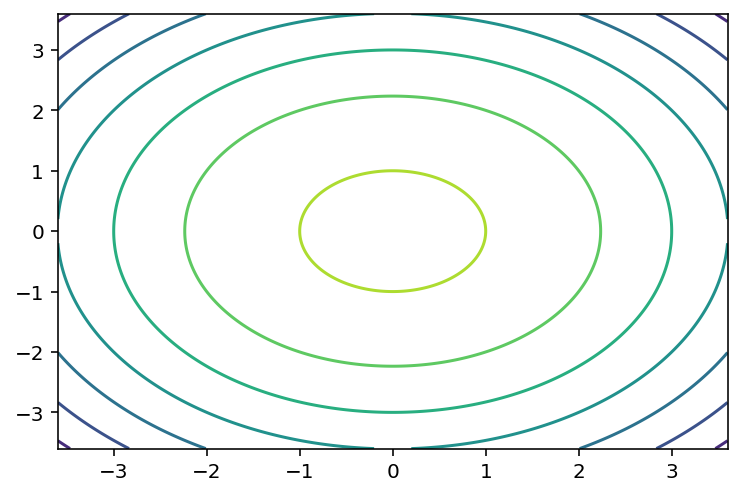

In [5]:
%config InlineBackend.figure_format = "retina"
%matplotlib inline
import matplotlib.pyplot as plt
plt.contour(X,Y,psi_lamb(X,Y))

We have used `contour` to draw the projection of the surface of $\psi(x,y)$ on the $xy$-plane. However, we notice that the contour is drawn even for $|x|>3$ and $|y|>3$ even though the actual cross-section should be lying within a circle of radius 3. 

We correct this by "multiplying" the `psi_lamb` with a truth value based on the boundary as follows:

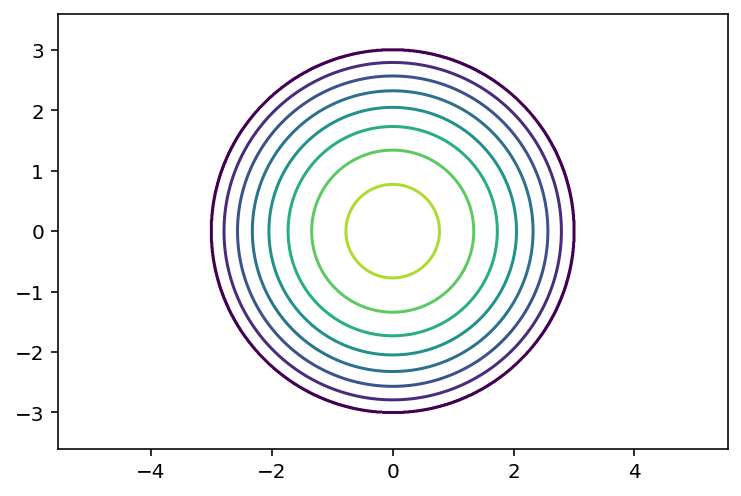

In [6]:
boundary_lamb = sp.lambdify((x,y),boundary_expr)

plt.contour(X,Y,psi_lamb(X,Y)*(boundary_lamb(X,Y)>0))
plt.axis('equal');

In the above code, we have done two important things:

1. The aspect ratio has been set to 1 by using `plt.axis('equal')`.

2. The contour plot has been plotted only for those combinations of values of (X,Y) which lie inside the circle. This has been achieved by using `(boundary_lamb(X,Y)>0)` which is the truth value representing the condition where the value of the bounary expression is greater than 0. For points, lying within the circle (our desired region), the truth value is `True`. One can check this simply by the following:

In [7]:
boundary_lamb(0,0)>0

True

In [8]:
boundary_lamb(3,3)>0

False

Next, we determine the torsional rigidity of the shaft. 

The torsional rigidity is given by $GJ = 4 G \int_A \psi \; {\rm d}A$. (Note that this is the formula for a simply-connected cross-section.)

We display the polar moment of inertia ($J$). The torsional rigidity can be found by just multiplying by $G$. 

It is easier if we exploit the axisymmetry of the geometry and represent the Prandtl stress function in terms of $r = \sqrt{x^2 + y^2}$ so that $\displaystyle \psi = \frac{1}{4} \left(R^2 - r^2 \right)$.

In [9]:
J = sp.integrate(4*K*(R**2-r**2)*2*sp.pi*r,(r,0,R)).subs(K,Kvalue)
display(Math(r'J = {}'.format(sp.latex(J))))

<IPython.core.display.Math object>

## Shaft with elliptical cross-section

The ellipse is given by: $\displaystyle \frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$. 

The Prandtl stress function is given by: $\displaystyle \psi = K \left(1 - \frac{x^2}{a^2} - \frac{y^2}{b^2}\right)$

In [49]:
#from sympy.plotting import plot3d
import matplotlib.pyplot as plt

a, b = sp.symbols('a, b', positive=True)
x, y, K = sp.symbols('x y K')

boundary = (1 - (x**2/a**2 + y**2/b**2))
psi = K*boundary

display(Math(r'\psi = {}'.format(sp.latex(psi))))

<IPython.core.display.Math object>

We solve for $K$ by noting that $\psi$ must satisfy the equation $\nabla^2 \psi = -1$.

In [50]:
lhs = sp.diff(psi,x,2)+sp.diff(psi,y,2)
rhs = -1
eq = sp.Eq(lhs,rhs)
sol = sp.solve(eq,K)
K_sol = sol[0]
display(Math(r'K = {}'.format(sp.latex(K_sol))))

<IPython.core.display.Math object>

Therefore, the solution for $\psi$ is:

In [53]:
psi_soln = psi.subs(K,K_sol)
display(Math(r'\psi = {}'.format(sp.latex(psi_soln))))

<IPython.core.display.Math object>

The torsional rigidity is given by: $\displaystyle GJ = 4G\int_A \psi \; {\rm d}A$, 

where the integration is basically a double integral. We carry out this double integral in steps; first with respect to $y$ and then with respect to $x$:

$\displaystyle \int_A \psi \; {\rm d}A = \int_{-a}^{a} \int_{-b\sqrt{1-\frac{x^2}{a^2}}}^{b\sqrt{1-\frac{x^2}{a^2}}} \psi \; {\rm d}x {\rm d}y$

In [68]:
int1 = sp.integrate(psi_soln,(y,-b*sp.sqrt(1-x**2/a**2),b*sp.sqrt(1-x**2/a**2)))

int2 = sp.integrate(int1.simplify(),(x,-a,a))

term2 = 4*G*int2
display(Math(r'GJ = {}'.format(sp.latex(term2))))

<IPython.core.display.Math object>

Let us plot the Prandtl stress function. We choose: $a = 5$ and $b = 3$. 

In [12]:
avalue = 5
bvalue = 3
Kvalue = K_sol.subs([(a,avalue),(b,bvalue)])
display(Math(r'K|_{{(a=5,b=3)}} = {}'.format(sp.latex(Kvalue))))

<IPython.core.display.Math object>

In [13]:
boundary_expr = boundary.subs([(a,avalue),(b,bvalue)])
psi_expr = Kvalue*boundary_expr

display(Math(r'\psi = {}'.format(sp.latex(psi_expr))))

<IPython.core.display.Math object>

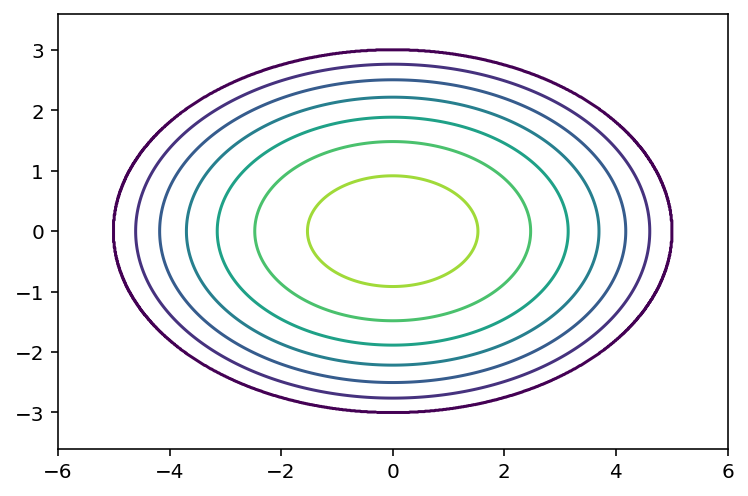

In [14]:
boundary_lamb = sp.lambdify((x,y),boundary_expr)
psi_lamb = sp.lambdify((x,y),psi_expr)


xdata = np.linspace(-1.2*avalue,1.2*avalue,1000)
ydata = np.linspace(-1.2*bvalue,1.2*bvalue,1000)
X, Y = np.meshgrid(xdata,ydata)

plt.contour(X,Y,psi_lamb(X,Y)*(boundary_lamb(X,Y)>0))

The two examples of circular and elliptical cross-sections we took earlier were basically examples of singly-connected domains. These are domains which do not have any holes in them. We would now like to consider some examples of multiply-connected domains i.e. domains which _do_ have holes in them.

The primary difference between the singly-connected domain and multiply-connected domains is the way that the Prandtl stress function is determined. For the singly-connected domain, there is only one boundary (the outer boundary of the domain), and over that boundary the Prandtl stress function is taken as 0. For the multiply-connected domain, there is more than one boundary (the boundaries of the holes in addition to the outer boundary). Over each boundary, the Prandtl stress function is a constant. But the value of the constant over the different boundaries are different. Without loss of generality, the value of the constant over the outer boundary is taken as 0. 

We will first illustrate the case of a multiply-connected domain using a circular annulus. 

## Circular Annulus

We consider a circular annulus whose outer radius is $a$ and inner radius is $b$. We set the origin of a $xy$-coordinate system at the origin of this circular annulus so that the equation of the circle constituting the outer boundary is: $x^2 + y^2 = a^2$. Equivalently, in a $r\theta$-coordinate system, the outer boundary will be given by $r=a$. 

The Prandtl stress function must satisfy the equation: $\displaystyle \nabla^2 \psi = -1$ in the domain. The boundary conditions are: at $r=a$, $\psi = 0$, and at $r=b$, $\psi$ must be some non-zero constant. 

We first note that due to the axisymmetry of the situation, the Prandtl stress function is solely dependent on the radial coordinate variable: $\psi \equiv \psi(r)$. Furthermore, since $\psi(a) = 0$, we can consider the solution to be of the form: $\psi(r) = K(a^2-r^2)$. This $K$ is unknown and needs to be found from the condition that this solution form for $\psi(r)$ must satisfy $\nabla^2 \psi = 1$. 

In [15]:
from polarUtilities import *

In [16]:
a, b = sp.symbols('a, b', positive=True)
K = sp.symbols('K')
psi = K*(a**2 - r**2)

from IPython.display import Math
display(Math(r'\psi(r) = {}'.format(sp.latex(psi))))

<IPython.core.display.Math object>

In [17]:
eq = sp.Eq(polarLaplacian(psi),-1)
sol, = sp.linsolve([eq],[K])
Kvalue = sol[0]
display(Math(r'K = {}'.format(sp.latex(Kvalue))))

<IPython.core.display.Math object>

So, the solution for $\psi(r)$ becomes:

In [18]:
psi_soln = psi.subs(K,Kvalue)
display(Math(r'\psi(r) = {}'.format(sp.latex(psi_soln))))

<IPython.core.display.Math object>

We note that the Prandtl stress function $\psi$ is a non-zero constant value at the inner boundary, i.e. at $r=b$:

In [19]:
psi_at_b = psi_soln.subs(r,b)
display(Math(r'\psi(b) = {}'.format(sp.latex(psi_at_b))))

<IPython.core.display.Math object>

We next determine the torsional rigidity of this circular annulus. Note that for a multiply-connected domain, the torsional rigidity is given by:

$\displaystyle GJ = 4G \sum_{i=1}^N \psi_i A_i + 4G \int_A \psi \; {\rm d} A$,

where the index $i$ represents the $i$-th boundary in a domain which has $N$ boundaries, out of which one is the outer boundary and $N-1$ are inner boundaries. 

Since we take $\psi$ to be equal to 0 over the outer boundary, the above formula is equivalent to:

$\displaystyle GJ = 4G \sum_{j=1}^{N-1} \psi_j A_j + 4G \int_A \psi \; {\rm d} A$,

where the index $j$ repressents the $j$-th inner boundary. 

It is extremely imporant to note that $A_j$ represents the area bounded by the $j$-th boundary. 

For the present case of the circular annulus, there is only such inner boundary ($r=b$). The area bounded by it is $\pi b^2$. 

We consider the two terms in the formula one by one. 

In [20]:
G = sp.symbols('G')
term1 = 4*G*psi_at_b*sp.pi*b**2
display(term1.simplify())

pi*G*b**2*(a**2 - b**2)

The second term is the integration of $\psi(r)$ over the domain of the cross-section. For the axisymmetric situation of the circular annulus, this integral becomes: 4G$\displaystyle \int_a^b \psi 2 \pi r \; {\rm d}r$.

In [21]:
term2 = 4*G*(sp.integrate(psi_soln*2*sp.pi*r,(r,b,a)))
display(term2.simplify())

pi*G*(a**4 - 2*a**2*b**2 + b**4)/2

Therefore, the torsional rigidity is 

In [22]:
torsional_rigidity = (term1+term2).simplify()
display(Math(r'GJ = {}'.format(sp.latex(torsional_rigidity))))

<IPython.core.display.Math object>

The above result matches with the result from undergraduate studies on torsion.

<span style='color:green'>NOTE: Before proceeding, we define the following function to reduce the amount of typing needed to nicely display our solution results at various steps:</span>

In [23]:
def mDisplay(string,value):
    from IPython.display import Math
    display(Math(r'{} = {}'.format(string, sp.latex(value))))

An example, let us use the above function to again display the torsional rigidity found previously for the circular annulus:

In [24]:
mDisplay(r'GJ',torsional_rigidity)

<IPython.core.display.Math object>

Henceforth, we will use this function `mDisplay` whenever we wish to display our solution results.

We next consider the case of the elliptical annulus. 

## Elliptical Annulus

The elliptical annulus is defined by the following boundaries:

$\displaystyle \frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$ 

and 

$\displaystyle \frac{x^2}{(pa)^2} + \frac{y^2}{(pb)^2} = 1$,

where $0<p<1$.

To determine the Prandtl stress function, we proceed as before by first considering its form to be $\displaystyle \psi = K\left(1 - \frac{x^2}{a^2} - \frac{y^2}{b^2} \right)$ which ensures that $\psi = 0$ over the outer boundary. Here, $K$ is unknown and will be determined from the condition that the Prandtl stress function satisfies the equation: $\nabla^2 \psi = -1$.

In [66]:
psi = K*(1-x**2/a**2 - y**2/b**2)
psi

K*(1 - y**2/b**2 - x**2/a**2)

In [26]:
p = sp.symbols('p',positive=True)
lhs = sp.diff(psi,x,2) + sp.diff(psi,y,2)
rhs = -1
eq = sp.Eq(lhs,rhs)

soln, = sp.linsolve([eq],[K])
Kvalue = soln[0]
mDisplay(r'K',Kvalue)

<IPython.core.display.Math object>

Therefore, the solution for the Prandtl stress function, $\psi$ becomes:

In [27]:
psi_soln = psi.subs(K,Kvalue)
mDisplay(r'\psi',psi_soln)

<IPython.core.display.Math object>

The constant value of the Prandtl stress function, $\psi$ at the inner boundary will be:

In [67]:
p = sp.symbols('p',positive=True)
psi_in = psi_soln.subs(x**2/a**2+y**2/b**2,p**2)
mDisplay(r'\psi_{{\rm in}}',psi_in)

<IPython.core.display.Math object>